# Principal Component Analysis with Cancer Data

In [3]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [4]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [40]:
colnames=('id_number','Clump_Thicknes','Cell_Size','Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class')

cancer_df=pd.read_csv("breast-cancer-wisconsin.csv",names=colnames)

In [6]:
cancer_df.head(10)

,id_number,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
cancer_df.dtypes

id_number                int64
Clump_Thicknes           int64
Cell_Size                int64
Cell_Shape               int64
Marginal_Adhesion        int64
Epithelial_Cell_Size     int64
Bare_Nuclei             object
Bland_Chromatin          int64
Normal_Nucleoli          int64
Mitoses                  int64
Class                    int64
dtype: object

In [8]:
cancer_df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [12]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thicknes,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [14]:
cancer_df.isna().any()

id_number               False
Clump_Thicknes          False
Cell_Size               False
Cell_Shape              False
Marginal_Adhesion       False
Epithelial_Cell_Size    False
Bare_Nuclei             False
Bland_Chromatin         False
Normal_Nucleoli         False
Mitoses                 False
Class                   False
dtype: bool

In [ ]:
#By looking at the above result , we can see that there are no missing values in the columns as every column is showing us the 
#Descriptive stats .
#But as practise when I check the data set manually, I can see there is ? value in bare_numclei column .THis has to be imputed 
#with a suitable value

In [33]:
# No missing values found. So let us try to remove ? from bare nuclei column

(cancer_df['Bare_Nuclei']=='?').value_counts()


False    683
True      16
Name: Bare_Nuclei, dtype: int64

In [ ]:
#It has 16 values

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values


In [34]:
cancer_df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [35]:
#Since value 1 has more frequency , we will replace ? with 1 as it will not disturb the data distribution much.

In [41]:
cancer_df.replace('?', '1',inplace=True)

In [42]:
cancer_df['Bare_Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [47]:
cancer_df['Bare_Nuclei']=cancer_df['Bare_Nuclei'].astype(int)

In [48]:
cancer_df.dtypes

id_number               int64
Clump_Thicknes          int64
Cell_Size               int64
Cell_Shape              int64
Marginal_Adhesion       int64
Epithelial_Cell_Size    int64
Bare_Nuclei             int32
Bland_Chromatin         int64
Normal_Nucleoli         int64
Mitoses                 int64
Class                   int64
dtype: object

In [50]:
cancer_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thicknes,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [51]:
cancer_df.corr()

,id_number,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
id_number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump_Thicknes,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare_Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [1]:
#Let us check for pair plots

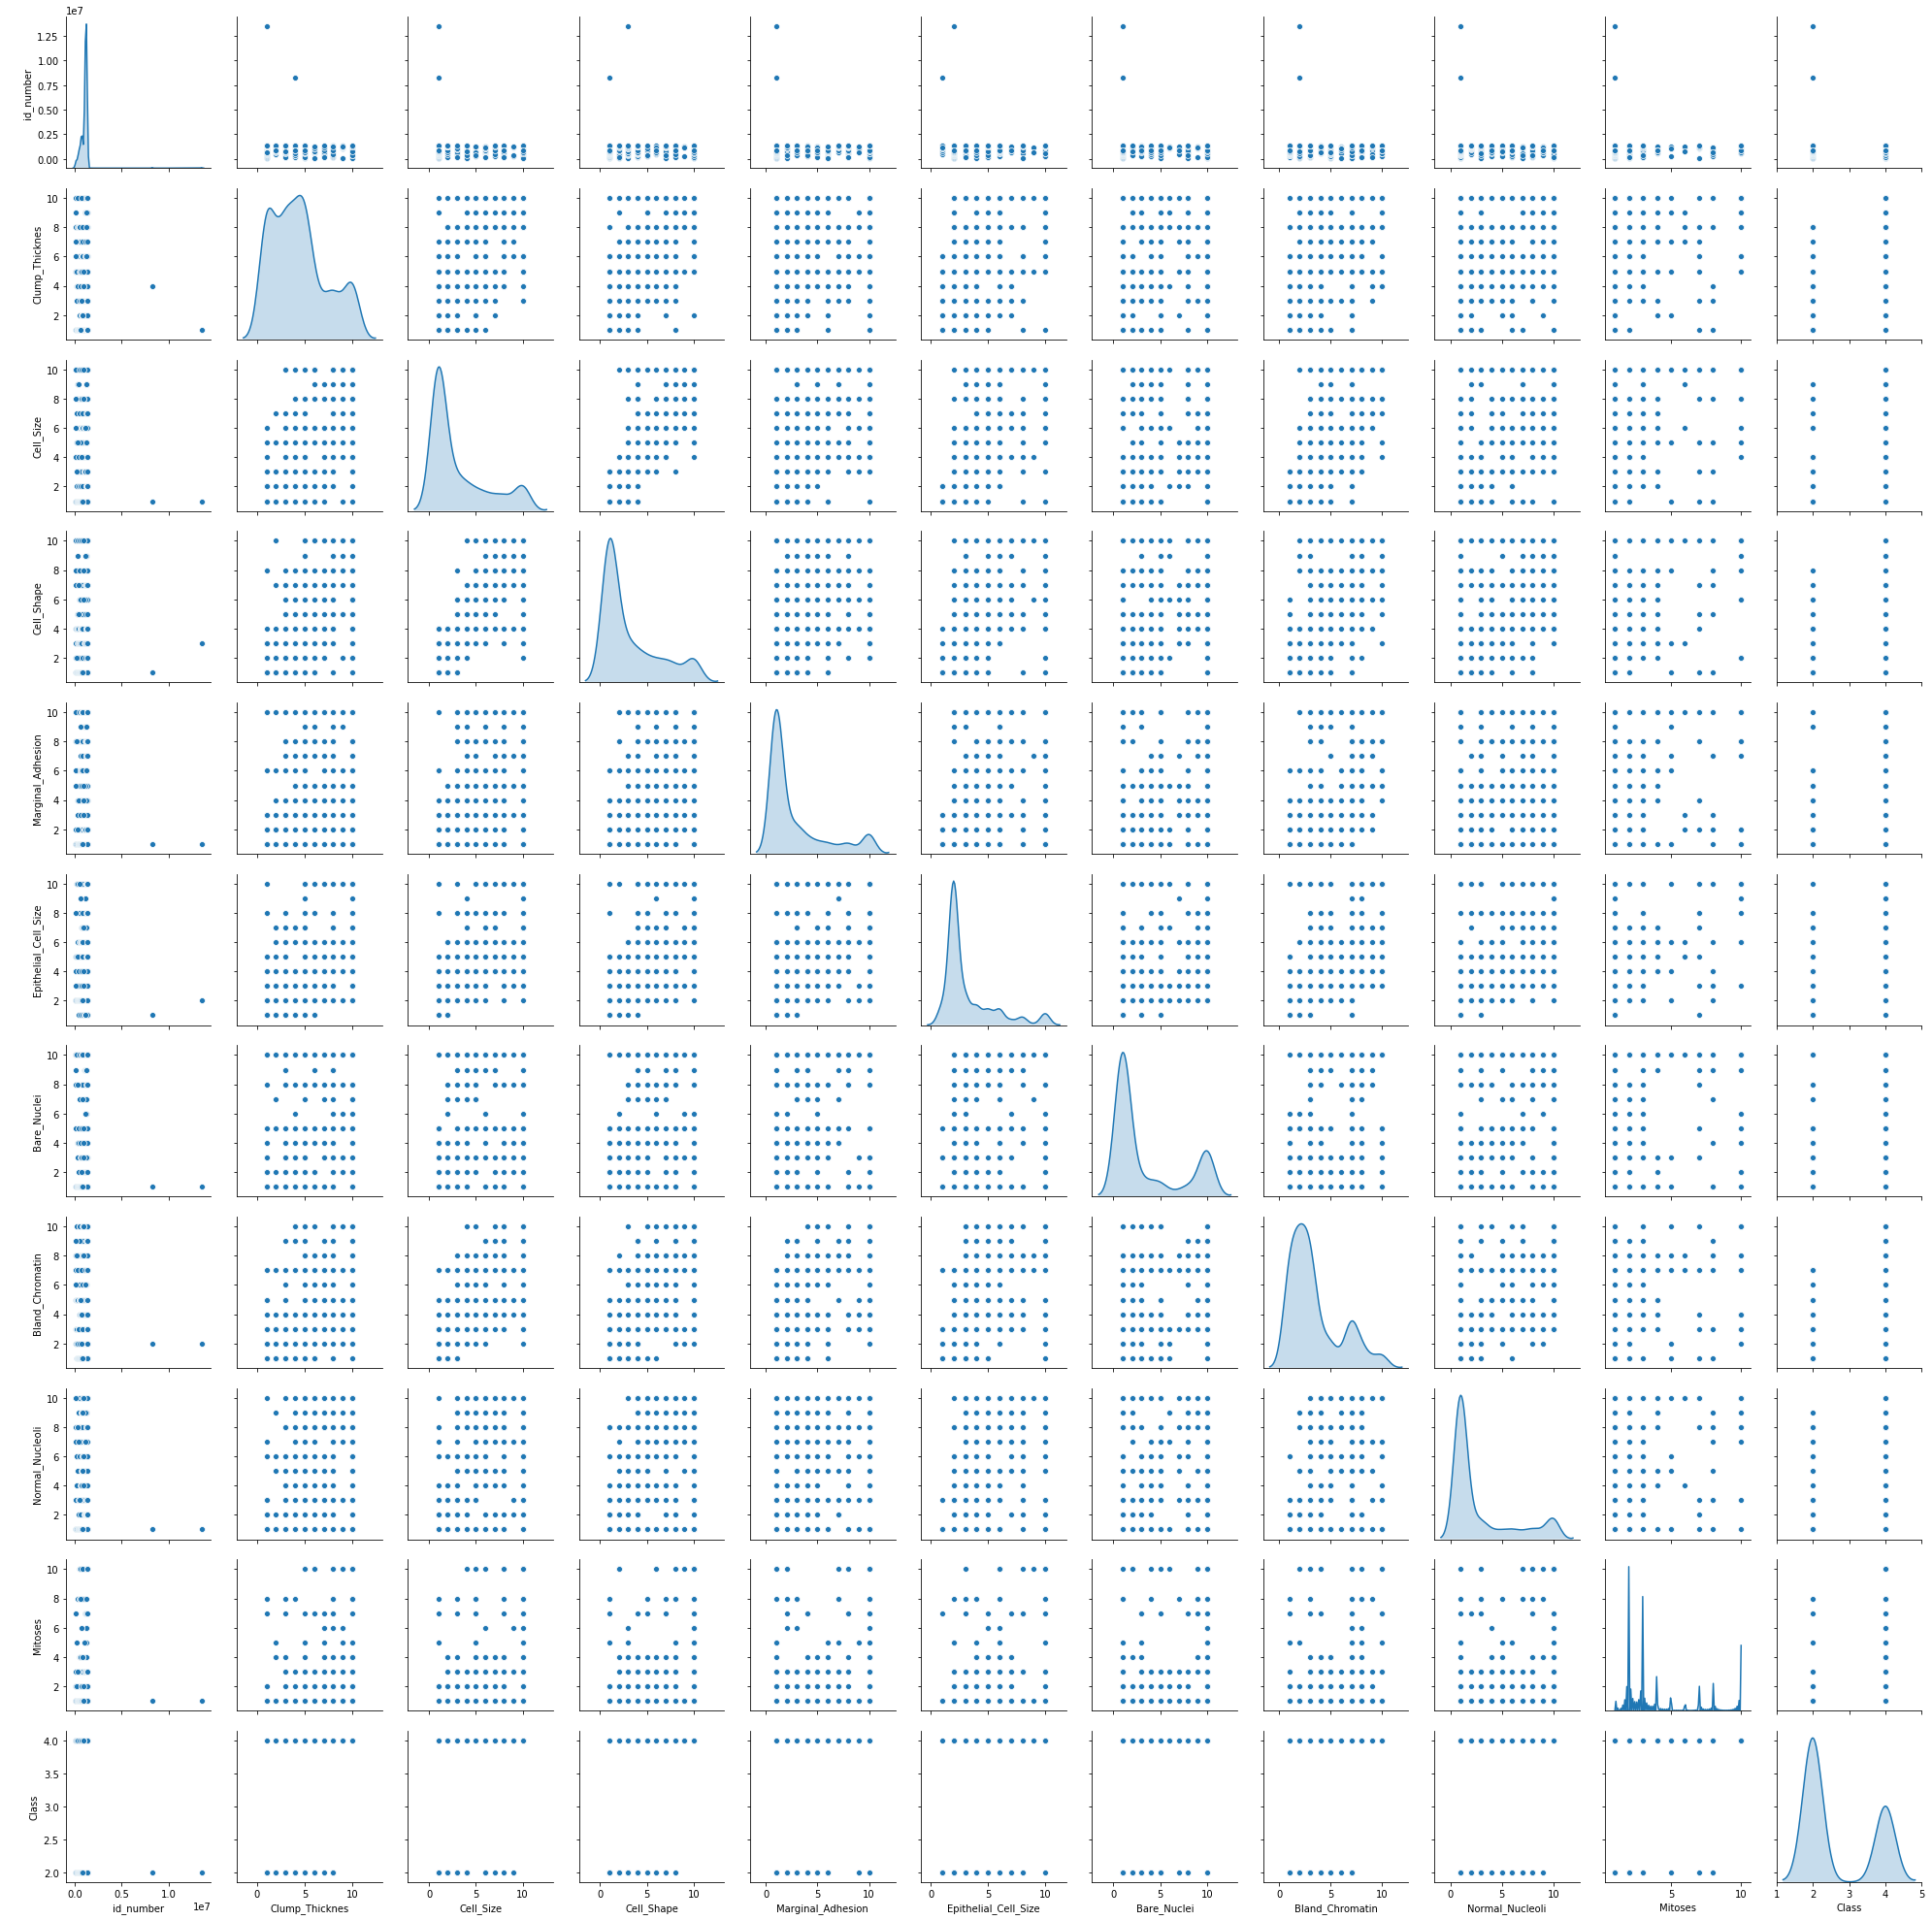

In [52]:
sns.pairplot(cancer_df,diag_kind='kde')

In [53]:
#From the above pairplot ,we can see that if we look at the diagnols ,almost all the distributions has more than two peaks
#Except Mitoses , all the other distributions has more than two peaks and skewed on the right side
#it indicates the possible presence of outliers.
#Also except the distributuion of clump_thickness , all the other distributions are more or less looks like a
#gaussian distribution.
#Also if we look at the correlation matrix , we can see that almost all the varaibles are correlated with each other to some extent except with ID
#because all most all the values are greater than abs(0.5).
#The target variable is significantly correlated with all other variables.


In [54]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [55]:
# We could see most of the outliers are now removed.

In [56]:
#check for the outliers


In [93]:
#remove id_number and Class as Class is the output variable and id_number will not play any role in clustering 
X=cancer_df.drop(['id_number','Class'],axis=1)

In [94]:
Q1=X.quantile(0.25)
Q3=X.quantile(0.75)
IQR=Q3-Q1

In [95]:
Q3+(1.5*IQR)

Clump_Thicknes          12.0
Cell_Size               11.0
Cell_Shape              11.0
Marginal_Adhesion        8.5
Epithelial_Cell_Size     7.0
Bare_Nuclei             11.0
Bland_Chromatin          9.5
Normal_Nucleoli          8.5
Mitoses                  1.0
dtype: float64

In [96]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Clump_Thicknes,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Epithelial_Cell_Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Bland_Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


In [97]:
Q1-(1.5*IQR)

Clump_Thicknes         -4.0
Cell_Size              -5.0
Cell_Shape             -5.0
Marginal_Adhesion      -3.5
Epithelial_Cell_Size   -1.0
Bare_Nuclei            -5.0
Bland_Chromatin        -2.5
Normal_Nucleoli        -3.5
Mitoses                 1.0
dtype: float64

In [98]:
((X<(Q1-(1.5*IQR)))|(X>(Q3+(1.5*IQR)))).any()

Clump_Thicknes          False
Cell_Size               False
Cell_Shape              False
Marginal_Adhesion        True
Epithelial_Cell_Size     True
Bare_Nuclei             False
Bland_Chromatin          True
Normal_Nucleoli          True
Mitoses                  True
dtype: bool

In [99]:
X[((X<(Q1-(1.5*IQR)))|(X>(Q3+(1.5*IQR)))).any(axis=1)].head()

,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
8,2,1,1,1,2,1,1,1,5
14,8,7,5,10,7,9,5,5,4
18,10,7,7,6,4,10,4,1,2
20,7,3,2,10,5,10,5,4,4
21,10,5,5,3,6,7,7,10,1


In [100]:
X["Marginal_Adhesion"]=X["Marginal_Adhesion"].map(lambda x: 8 if x>8 else x)


In [101]:
X["Epithelial_Cell_Size"]=X["Epithelial_Cell_Size"].map(lambda x: 7 if x>7 else x)

In [102]:
X["Bland_Chromatin"]=X["Bland_Chromatin"].map(lambda x: 9 if x>9 else x)

In [103]:
X["Normal_Nucleoli"]=X["Normal_Nucleoli"].map(lambda x: 8 if x>8 else x)

In [104]:
X["Mitoses_Imputed"]=X["Mitoses"].map(lambda x: 1 if x>2 else x)

In [105]:
#In order to remove outliers , I clubbed all the values > 1 into 2 for mitoses column


In [108]:
X.drop('Mitoses',axis=1,inplace=True)

In [110]:
X.dtypes

Clump_Thicknes          int64
Cell_Size               int64
Cell_Shape              int64
Marginal_Adhesion       int64
Epithelial_Cell_Size    int64
Bare_Nuclei             int32
Bland_Chromatin         int64
Normal_Nucleoli         int64
Mitoses_Imputed         int64
dtype: object

# Q6 Create a covariance matrix for identifying Principal components

In [129]:
# PCA
# Step 1 - Create covariance matrix
M= X.mean()
#Centre it to Mean
Cen = X-M

Cen

,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses_Imputed
0,0.58226,-2.134478,-2.207439,-1.642346,-1.04721,-2.486409,-0.409156,-1.669528,-0.050072
1,0.58226,0.865522,0.792561,2.357654,3.95279,6.513591,-0.409156,-0.669528,-0.050072
2,-1.41774,-2.134478,-2.207439,-1.642346,-1.04721,-1.486409,-0.409156,-1.669528,-0.050072
3,1.58226,4.865522,4.792561,-1.642346,-0.04721,0.513591,-0.409156,4.330472,-0.050072
4,-0.41774,-2.134478,-2.207439,0.357654,-1.04721,-2.486409,-0.409156,-1.669528,-0.050072
5,3.58226,6.865522,6.792561,5.357654,3.95279,6.513591,5.590844,4.330472,-0.050072
6,-3.41774,-2.134478,-2.207439,-1.642346,-1.04721,6.513591,-0.409156,-1.669528,-0.050072
7,-2.41774,-2.134478,-1.207439,-1.642346,-1.04721,-2.486409,-0.409156,-1.669528,-0.050072
8,-2.41774,-2.134478,-2.207439,-1.642346,-1.04721,-2.486409,-2.409156,-1.669528,-0.050072
9,-0.41774,-1.134478,-2.207439,-1.642346,-1.04721,-2.486409,-1.409156,-1.669528,-0.050072


In [130]:
V=Cen.cov()
V

,Clump_Thicknes,Cell_Size,Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses_Imputed
Clump_Thicknes,7.928395,5.541164,5.477690,3.499190,2.749591,6.017147,3.757201,4.053722,0.133781
Cell_Size,5.541164,9.311403,8.224213,5.447879,4.251522,7.589223,5.454927,5.823874,0.087813
Cell_Shape,5.477690,8.224213,8.832265,5.118710,3.984462,7.615287,5.175748,5.630256,0.079856
Marginal_Adhesion,3.499190,5.447879,5.118710,6.092531,2.893700,6.102582,3.997549,4.102266,0.063779
Epithelial_Cell_Size,2.749591,4.251522,3.984462,2.893700,3.153928,4.042906,2.760026,3.194707,0.033449
Bare_Nuclei,6.017147,7.589223,7.615287,6.102582,4.042906,13.118368,5.845110,5.672436,0.171885
Bland_Chromatin,3.757201,5.454927,5.175748,3.997549,2.760026,5.845110,5.597395,4.195580,0.068309
Normal_Nucleoli,4.053722,5.823874,5.630256,4.102266,3.194707,5.672436,4.195580,6.883468,0.119723
Mitoses_Imputed,0.133781,0.087813,0.079856,0.063779,0.033449,0.171885,0.068309,0.119723,0.047633


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [112]:
from numpy.linalg import eig

In [132]:
values, vectors = eig(V)

In [140]:
values

array([4.41704039e+01, 4.63981388e+00, 3.99278763e+00, 4.28966452e-02,
       2.44689929e+00, 2.11649813e+00, 1.73777031e+00, 1.03903934e+00,
       7.79277338e-01])

In [134]:
vectors

array([[-3.17334386e-01,  1.05174423e-01,  9.07449611e-01,
        -1.39101312e-02,  1.24204917e-01,  2.19475269e-01,
        -2.43643215e-02,  1.97240029e-02,  1.65375917e-04],
       [-4.23685043e-01,  3.27788713e-01, -1.06152667e-01,
        -3.47938407e-03, -4.02397119e-01, -1.16709099e-01,
        -3.48984597e-02,  1.00410113e-01,  7.17579613e-01],
       [-4.11883846e-01,  2.62044504e-01, -4.73372327e-02,
         1.41240555e-02, -4.03108475e-01, -2.67892520e-01,
        -8.63555373e-02, -4.18579575e-01, -5.85076994e-01],
       [-3.02623223e-01, -6.47479724e-02, -3.07222831e-01,
         4.62296847e-03,  2.63770320e-02,  8.23732896e-01,
        -3.34205759e-01, -1.30297630e-01, -4.37841552e-02],
       [-2.17756153e-01,  1.26765683e-01, -9.95190415e-02,
         1.95425333e-02, -2.99110354e-02, -3.99794030e-02,
        -1.34409442e-01,  8.83175225e-01, -3.54498759e-01],
       [-4.68574934e-01, -8.38956708e-01, -7.48707389e-03,
        -1.43948452e-02,  1.34090403e-02, -2.607299

# Q8 Find variance and cumulative variance by each eigen vector

In [142]:
variance=(values/(np.sum(values)))*100

In [143]:
variance

array([7.24516098e+01, 7.61057076e+00, 6.54926978e+00, 7.03622952e-02,
       4.01358777e+00, 3.47163899e+00, 2.85042121e+00, 1.70431026e+00,
       1.27822914e+00])

In [146]:
cumvariance=np.cumsum(variance)
cumvariance

array([ 72.4516098 ,  80.06218056,  86.61145033,  86.68181263,
        90.69540039,  94.16703939,  97.0174606 ,  98.72177086,
       100.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [147]:
from sklearn.decomposition import PCA

In [148]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [149]:
X_pca = pca.transform(X)

In [151]:
X_pca.shape

(699, 9)

In [152]:
pca.components_

array([[ 3.17334386e-01,  4.23685043e-01,  4.11883846e-01,
         3.02623223e-01,  2.17756153e-01,  4.68574934e-01,
         2.98832523e-01,  3.19749689e-01,  6.30898205e-03],
       [ 1.05174423e-01,  3.27788713e-01,  2.62044504e-01,
        -6.47479724e-02,  1.26765683e-01, -8.38956708e-01,
         3.49441101e-02,  2.95649315e-01, -9.26143067e-03],
       [-9.07449611e-01,  1.06152667e-01,  4.73372327e-02,
         3.07222831e-01,  9.95190415e-02,  7.48707389e-03,
         1.48314262e-01,  1.91089735e-01, -1.29471716e-02],
       [-1.24204917e-01,  4.02397119e-01,  4.03108475e-01,
        -2.63770320e-02,  2.99110354e-02, -1.34090403e-02,
        -1.07627447e-01, -8.03903547e-01, -2.32046174e-02],
       [ 2.19475269e-01, -1.16709099e-01, -2.67892520e-01,
         8.23732896e-01, -3.99794030e-02, -2.60729951e-01,
         2.02786190e-01, -2.77762364e-01, -7.39440300e-03],
       [-2.43643215e-02, -3.48984597e-02, -8.63555373e-02,
        -3.34205759e-01, -1.34409442e-01, -6.073925

In [153]:
pca.explained_variance_

array([4.41704039e+01, 4.63981388e+00, 3.99278763e+00, 2.44689929e+00,
       2.11649813e+00, 1.73777031e+00, 1.03903934e+00, 7.79277338e-01,
       4.28966452e-02])

In [154]:
pca.explained_variance_ratio_

array([7.24516098e-01, 7.61057076e-02, 6.54926978e-02, 4.01358777e-02,
       3.47163899e-02, 2.85042121e-02, 1.70431026e-02, 1.27822914e-02,
       7.03622952e-04])

In [155]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7245161 , 0.80062181, 0.8661145 , 0.90625038, 0.94096677,
       0.96947098, 0.98651409, 0.99929638, 1.        ])

# Q10 Find correlation between components and features

In [166]:
cnames=('Clump_Thicknes','Cell_Size','Cell_Shape','Marginal_Adhesion','Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses')

In [167]:
PCAfeatures = pd.DataFrame(pca.components_,columns=cnames)

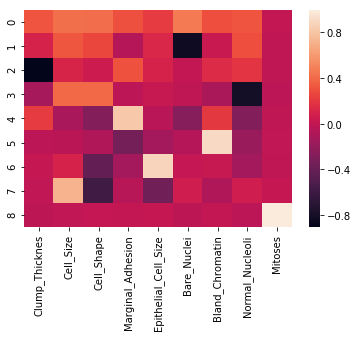

In [173]:
sns.heatmap(PCAfeatures)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [174]:
jokes_df=pd.read_csv("jokes.csv")

In [175]:
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [181]:
ratings=jokes_df.head(200).drop('NumJokes',axis=1)

In [182]:
ratings.shape

(200, 100)

# Q13 Change the column indices from 0 to 99

In [ ]:
#Columns names are already given properly , hence not changing the names

# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [183]:
ratings.replace(99, 0)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [184]:
from scipy.stats import zscore

In [185]:

ratings_diff=ratings.apply(zscore)

In [186]:
ratings_diff.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-0.834017,-0.263026,-0.942683,-1.066125,-1.380394,-0.883915,-1.785253,0.877475,-1.031886,-0.593006,...,-1.397875,0.740224,0.773171,0.772626,0.740124,0.740442,-1.393526,0.707782,0.789401,0.708077
1,-0.569744,-0.499046,-0.603680,-0.816405,-0.432101,-0.909860,-0.160595,-1.083559,-0.667499,-0.207319,...,-1.397875,-1.460133,-1.361107,-1.157292,-1.383886,-1.416016,-1.210820,-1.403709,-1.358070,-1.416331
2,1.538226,2.081847,1.356697,1.069553,1.672963,-0.486467,1.578074,1.929134,1.171165,2.269575,...,0.700489,0.740224,0.773171,-1.131458,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
3,1.538226,-0.274463,1.356697,1.069553,0.339079,-0.511294,-0.532913,1.298139,1.171165,-0.410922,...,0.700489,0.740224,0.773171,-1.312507,0.740124,0.740442,0.806302,0.707782,0.789401,0.708077
4,-0.471585,-0.371678,-0.826508,-1.010920,0.257903,-0.658016,1.223570,0.968206,-0.857649,-0.303603,...,-1.346169,-1.237240,-1.263088,-1.213830,-1.257118,-1.337339,-1.209769,-1.270805,-1.230868,-1.404834


### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke

In [199]:
meanratings=ratings_diff.mean()

In [200]:
meanratings

Joke1     -4.940492e-17
Joke2     -6.217249e-17
Joke3     -6.106227e-17
Joke4      2.536860e-16
Joke5     -8.881784e-18
Joke6     -8.881784e-18
Joke7     -1.665335e-18
Joke8      2.331468e-17
Joke9     -9.492407e-17
Joke10     9.992007e-18
Joke11    -2.386980e-17
Joke12     1.126876e-16
Joke13     6.661338e-17
Joke14    -1.221245e-17
Joke15    -2.164935e-17
Joke16    -1.065814e-16
Joke17     1.637579e-17
Joke18     2.331468e-17
Joke19    -9.159340e-18
Joke20     2.997602e-17
Joke21    -4.718448e-18
Joke22     9.020562e-17
Joke23     3.275158e-17
Joke24    -5.606626e-17
Joke25     4.996004e-18
Joke26     2.983724e-17
Joke27    -5.440093e-17
Joke28    -1.672273e-17
Joke29    -2.775558e-18
Joke30     1.054712e-17
               ...     
Joke71     1.743050e-16
Joke72     1.443290e-17
Joke73     2.153833e-16
Joke74    -6.772360e-17
Joke75     2.997602e-17
Joke76     4.996004e-17
Joke77    -3.030909e-16
Joke78     7.327472e-17
Joke79     7.771561e-18
Joke80    -2.886580e-16
Joke81     3.885

# Q17 Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [207]:
meanratings.sort_values(ascending=False).head(10).index

Index(['Joke88', 'Joke85', 'Joke4', 'Joke96', 'Joke73', 'Joke71', 'Joke94',
       'Joke84', 'Joke97', 'Joke64'],
      dtype='object')